In [ ]:
import torch
print(torch.__version__)

In [27]:
from torch import nn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split 

In [28]:
# Set up device agnostic coding

if torch.cuda.is_available():
    device = "cuda"
elif torch.backends.mps.is_available():
    device = torch.device("mps")
else: 
    device = "cpu"
print(f"Using device = {device}")           

Using device = cpu


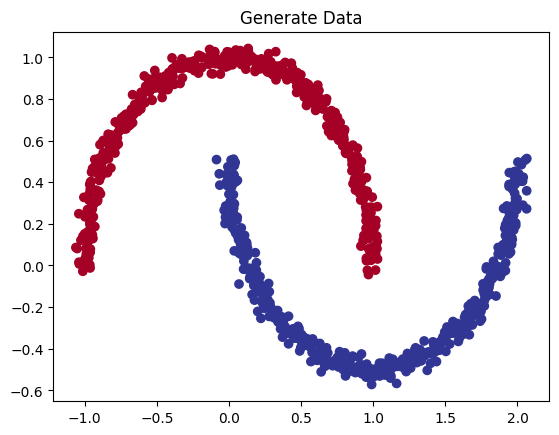

In [29]:
n_samples = 1000
X,y = make_moons(n_samples=n_samples, noise=0.03,random_state=42)
plt.scatter(X[:,0],X[:,1], c=y, cmap=plt.cm.RdYlBu);
plt.title("Generate Data")
plt.show()

In [30]:
y

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1,

In [31]:
print(f"Before { type(X)}, {type(y)}")
X = torch.from_numpy(X).type(torch.float)
y = torch.from_numpy(y).type(torch.float)
print(f"After {type(X)},{type(y)}")

Before <class 'numpy.ndarray'>, <class 'numpy.ndarray'>
After <class 'torch.Tensor'>,<class 'torch.Tensor'>


In [32]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

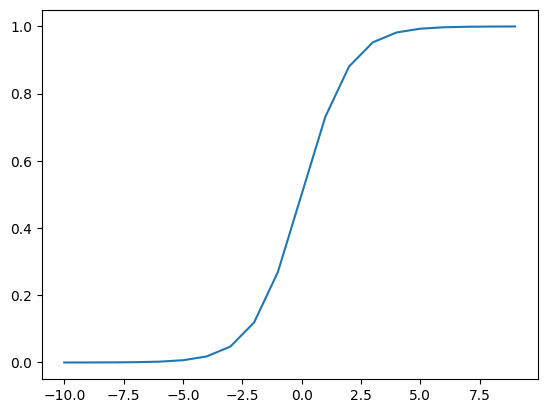

In [33]:
def sigmoid(z):
    return 1/(1+np.exp(-z))

val = range(-10,10)
sigmoid_val = [sigmoid(n) for n in val]
plt.plot(val,sigmoid_val)

In [34]:
print(f"{sigmoid(100):.100f}")

1.0000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000000


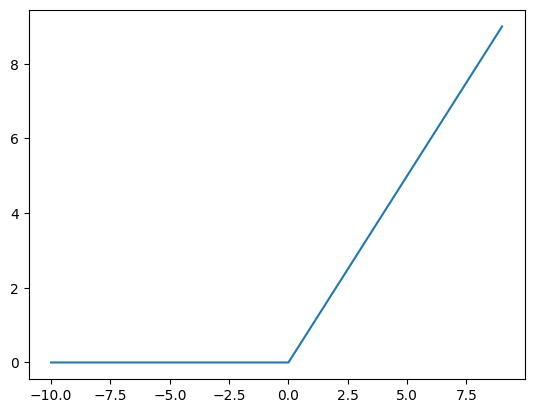

In [35]:
def relu(z):
    if z<=0:
        return 0
    else:
        return z

val = range(-10,10) 
relu_val = [relu(n) for n in val]
plt.plot(val,relu_val);   

In [36]:
class FirstNeuralNetwork(nn.Module):
    def __init__(self):
        super(). __init__()
        self.layer_1 = nn.Linear(in_features=2, out_features=10)
        self.layer_2 = nn.Linear(in_features=10, out_features=10)
        self.layer_3 = nn.Linear(in_features=10, out_features=1)
        self.relu = nn.ReLU()

    def forward(self,x):
        x = self.layer_1(x)
        x = self.relu(x)
        x = self.layer_2(x)
        x = self.relu(x)
        x = self.layer_3(x)
        return x
           
        

In [37]:
model = FirstNeuralNetwork()
list(model.parameters())

[Parameter containing:
 tensor([[ 0.5406,  0.5869],
         [-0.1657,  0.6496],
         [-0.1549,  0.1427],
         [-0.3443,  0.4153],
         [ 0.6233, -0.5188],
         [ 0.6146,  0.1323],
         [ 0.5224,  0.0958],
         [ 0.3410, -0.0998],
         [ 0.5451,  0.1045],
         [-0.3301,  0.1802]], requires_grad=True),
 Parameter containing:
 tensor([-0.3258, -0.0829, -0.2872,  0.4691, -0.5582, -0.3260, -0.1997, -0.4252,
          0.0667, -0.6984], requires_grad=True),
 Parameter containing:
 tensor([[ 0.2856, -0.2686,  0.2441,  0.0526, -0.1027,  0.1954,  0.0493,  0.2555,
           0.0346, -0.0997],
         [ 0.0850, -0.0858,  0.1331,  0.2823,  0.1828, -0.1382,  0.1825,  0.0566,
           0.1606, -0.1927],
         [-0.3130, -0.1222, -0.2426,  0.2595,  0.0911,  0.1310,  0.1000, -0.0055,
           0.2475, -0.2247],
         [ 0.0199, -0.2158,  0.0975, -0.1089,  0.0969, -0.0659,  0.2623, -0.1874,
          -0.1886, -0.1886],
         [ 0.2844,  0.1054,  0.3043, -0.2610,

In [38]:
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(
     params=model.parameters(), lr=0.05
)

In [39]:
def accuracy_fn(y_true,y_pred):
    correct = torch.eq(y_true,y_pred).sum().item()
    acc =(correct/len(y_true))*100
    return acc

In [40]:
epochs = 5000
torch.manual_seed(42)
trainLossList = []
testLossList = []
X_train,y_train = X_train.to(device),y_train.to(device)
X_test,y_test = X_test.to(device),y_test.to(device)
model.to(device)
for epoch in range(epochs):
    ##Training
    model.train()
    #1.Forward Pass
    y_logit = model(X_train).squeeze()
    y_preds = torch.round(torch.sigmoid(y_logit))
    #2 Compute Training Loss
    loss = loss_fn(y_logit,y_train)
    #3 Zero grad the optimizer
    optimizer.zero_grad()
    #4 Backpropagate
    loss.backward()
    #5 Step the optimizer
    optimizer.step()

    acc = accuracy_fn(y_true=y_train,y_pred=y_preds)
    #Testing
    model.eval()
    with torch.inference_mode():
        test_logits = model(X_test).squeeze()
        test_preds = torch.round(torch.sigmoid(test_logits))
        test_loss = loss_fn(test_logits,y_test)
        test_acc = accuracy_fn(y_true=y_test,y_pred=test_preds)
    if(epoch+1)%100 == 0:
        print(f'Epoch{epoch+1} | Train Loss : {loss:.4f}|Train Acc: {acc}| Test loss:{test_loss:.4f}|Test Acc:{test_acc}')
    trainLossList.append(loss.cpu().detach().numpy())
    testLossList.append(test_loss.cpu().detach().numpy())        
                   

Epoch100 | Train Loss : 0.5942|Train Acc: 75.375| Test loss:0.6021|Test Acc:71.0
Epoch200 | Train Loss : 0.3868|Train Acc: 81.875| Test loss:0.4039|Test Acc:77.0
Epoch300 | Train Loss : 0.2880|Train Acc: 86.375| Test loss:0.2976|Test Acc:85.0
Epoch400 | Train Loss : 0.2367|Train Acc: 88.625| Test loss:0.2381|Test Acc:90.0
Epoch500 | Train Loss : 0.2094|Train Acc: 90.125| Test loss:0.2058|Test Acc:92.0
Epoch600 | Train Loss : 0.1907|Train Acc: 91.375| Test loss:0.1854|Test Acc:92.5
Epoch700 | Train Loss : 0.1720|Train Acc: 92.5| Test loss:0.1658|Test Acc:93.0
Epoch800 | Train Loss : 0.1513|Train Acc: 93.875| Test loss:0.1446|Test Acc:94.0
Epoch900 | Train Loss : 0.1288|Train Acc: 94.75| Test loss:0.1218|Test Acc:96.0
Epoch1000 | Train Loss : 0.1067|Train Acc: 95.625| Test loss:0.0998|Test Acc:97.5
Epoch1100 | Train Loss : 0.0863|Train Acc: 97.0| Test loss:0.0798|Test Acc:98.5
Epoch1200 | Train Loss : 0.0689|Train Acc: 98.5| Test loss:0.0630|Test Acc:99.0
Epoch1300 | Train Loss : 0.0549|

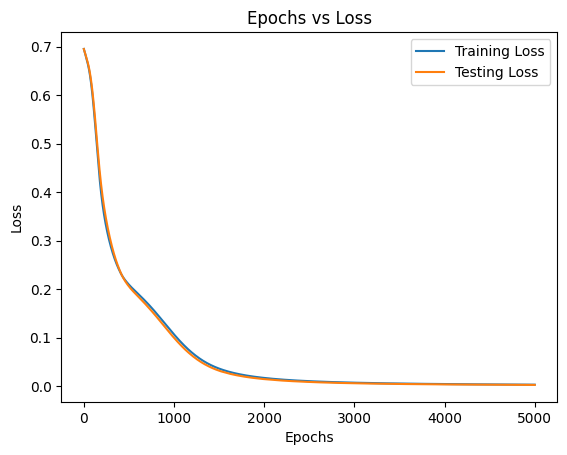

In [41]:
plt.plot(range(epochs), trainLossList, label='Training Loss')
plt.plot(range(epochs), testLossList, label='Testing Loss')
plt.legend()
plt.xlabel('Epochs')
plt.ylabel("Loss")
plt.title("Epochs vs Loss")
plt.show()

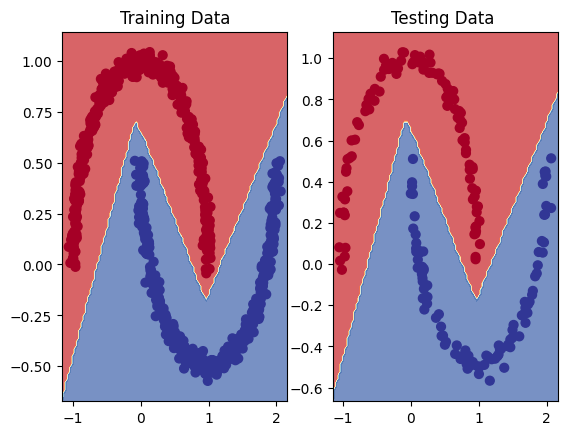

In [42]:
from helper_functions import plot_decision_boundary
plt.Figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.title("Training Data")
plot_decision_boundary(model, X_train, y_train)
plt.subplot(1, 2, 2)
plt.title("Testing Data ")
plot_decision_boundary(model, X_test, y_test)